# Practice with Professor (Session 7)
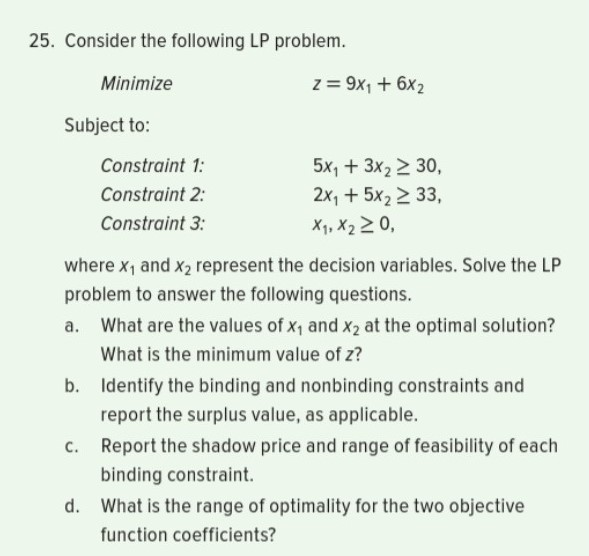

In [13]:
import pulp as p
import pandas as pd 

x1 = p.LpVariable('x1', lowBound=0)
x2 = p.LpVariable('x2', lowBound=0)

In [2]:
prob = p.LpProblem("Minimization", sense=p.LpMinimize)

In [3]:
prob += 9*x1 + 6*x2

In [4]:
prob += 5*x1 + 3*x2 >=30, 'Constraint1'
prob += 2*x1 + 5*x2 >=33, 'Constraint2'

In [5]:
prob

Minimization:
MINIMIZE
9*x1 + 6*x2 + 0
SUBJECT TO
Constraint1: 5 x1 + 3 x2 >= 30

Constraint2: 2 x1 + 5 x2 >= 33

VARIABLES
x1 Continuous
x2 Continuous

In [8]:
status = prob.solve()
p.LpStatus[status]

'Optimal'

In [9]:
p.value(prob.objective) #minimum value z

57.3157893

In [10]:
p.value(x1)

2.6842105

In [11]:
p.value(x2)

5.5263158

In [12]:
for variable in prob.variables():
    print(variable.name, '=',variable.varValue)

x1 = 2.6842105
x2 = 5.5263158


In [15]:
l = []
for name, c in prob.constraints.items():
    l.append([name, str(prob.constraints[name]), c.pi, c.slack])

pd.DataFrame(l, columns=['name','constraints','shadow_price','slack'])

# slack == 0; nonbinding w/o surplus

,name,constraints,shadow_price,slack
0,Constraint1,5*x1 + 3*x2 >= 30,1.736842,-0.0
1,Constraint2,2*x1 + 5*x2 >= 33,0.157895,-0.0


In [16]:
prob.solve(p.GLPK(options=['--ranges sensitivity.txt']))

file=open('sensitivity.txt')
print(file.read())
file.close()

#upper part: shadow price & range of feasibility (activity range)
#lower part: range of optimality (obj coef range)

GLPK 5.0  - SENSITIVITY ANALYSIS REPORT                                                                         Page   1

Problem:    
Objective:  OBJ = 57.31578947 (MINimum)

   No. Row name     St      Activity         Slack   Lower bound       Activity      Obj coef  Obj value at Limiting
                                          Marginal   Upper bound          range         range   break point variable
------ ------------ -- ------------- ------------- -------------  ------------- ------------- ------------- ------------
     1 Constraint1  NL      30.00000        .           30.00000       19.80000      -1.73684      39.60000 x1
                                           1.73684          +Inf       82.50000          +Inf     148.50000 x2

     2 Constraint2  NL      33.00000        .           33.00000       12.00000       -.15789      54.00000 x2
                                            .15789          +Inf       50.00000          +Inf      60.00000 x1

GLPK 5.0  - SENSITIVITY